#Lead Scoring - Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Importing Libraries & Dataset


In [161]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [162]:
# Importing Dataset

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##Step 2: Inspecting the Data Frame

In [163]:
# shape of the dataset

leads.shape

(9240, 37)

In [164]:
# desciption of numerical columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [165]:
# checking for null value 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##Step 3: Data Cleaning

In [166]:
# we have observed that there is "select" in many columns. "select" is where customer have not feeded any option
# So, lets convert "select" to "NaN"

leads= leads.replace("Select",np.NaN)

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [167]:
# Checking the percentage of null values in all columns

null_count=(leads.isnull().sum()*100/len(leads.index)).sort_values(ascending=False)
null_count

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [168]:
# checking columns having null values >45%

null_count=null_count[null_count>=45]
null_count

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Profile Score            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Index           45.649351
dtype: float64

In [169]:
# Drop columns which has more than 45% null values

cols_dropped=([null_count[null_count >=45].index])
leads.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [170]:
# Checking the percentage of null values in remain columns

(leads.isnull().sum()*100/len(leads.index)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.0000

In [171]:
#checking unique count of columns

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [172]:
# dropping the columns with only one category variable
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)

In [173]:
# Checking the percentage of null values in remain columns

(leads.isnull().sum()*100/len(leads.index)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Total Time Spent on Website                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Last Notable Activity                             0.0000

In [174]:
# dropping all the sales generated columns as they are not necessary for the model and with high missing value
leads = leads.drop(['Prospect ID','Last Activity','Tags','City','Last Notable Activity'],axis = 1)

In [175]:
# Checking the percentage of null values in remain columns

(leads.isnull().sum()/len(leads.index)*100).sort_values(ascending=False)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Source                                       0.389610
Total Time Spent on Website                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [176]:
#checking skewness of the column

leads['What matters most to you in choosing a course'].value_counts()/len(leads['What matters most to you in choosing a course'])*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [177]:
#Looking to the above values column, it will be better to drop this column

leads=leads.drop(['What matters most to you in choosing a course'],axis=1)

In [178]:
#checking skewness of the column

leads['Specialization'].value_counts()/len(leads['Specialization'])*100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [179]:
#checking skewness of the column

leads['What is your current occupation'].value_counts()/len(leads['What is your current occupation'])*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [180]:
#checking skewness of the column

leads['Country'].value_counts()/len(leads['Country'])*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Philippines              0.021645
Bangladesh               0.021645
Italy                    0.021645
Uganda                   0.021645
Netherlands              0.021645
Belgium                  0.021645
Malaysia                 0.010823
Switzerland   

In [181]:
# Checking for the Skewness
leads['Do Not Email'].value_counts()/len(leads['Do Not Email'])*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [182]:
# Checking for the Skewness
leads['Do Not Call'].value_counts()/len(leads['Do Not Call'])*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [183]:
# Checking for the Skewness
leads['Search'].value_counts()/len(leads['Search'])*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [184]:
# Checking for the Skewness
leads['Newspaper Article'].value_counts()/len(leads['Newspaper Article'])*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [185]:
# Checking for the Skewness
leads['X Education Forums'].value_counts()/len(leads['X Education Forums'])*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [186]:
# Checking for the Skewness
leads['Newspaper'].value_counts()/len(leads['Newspaper'])*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [187]:
# Checking for the Skewness
leads['Digital Advertisement'].value_counts()/len(leads['Digital Advertisement'])*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [188]:
# Checking for the Skewness
leads['Through Recommendations'].value_counts()/len(leads['Through Recommendations'])*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [189]:
# Checking for the Skewness
leads['A free copy of Mastering The Interview'].value_counts()/len(leads['A free copy of Mastering The Interview'])*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [190]:
# dropping the columns with high skewness
leads = leads.drop(['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search','Do Not Call','Do Not Email'], axis = 1)

In [191]:
# checking for the missing values after dropping the unnecessary variables 
(leads.isnull().sum()/len(leads)*100).sort_values(ascending=False)

Specialization                            36.580087
What is your current occupation           29.112554
Country                                   26.634199
Page Views Per Visit                       1.482684
TotalVisits                                1.482684
Lead Source                                0.389610
A free copy of Mastering The Interview     0.000000
Total Time Spent on Website                0.000000
Converted                                  0.000000
Lead Origin                                0.000000
Lead Number                                0.000000
dtype: float64

In [192]:
# imputing the missing value of the column with its mode
leads['Specialization'] = leads['Specialization'].fillna(leads['Specialization'].mode()[0])
leads['Specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [193]:
# imputing the missing value of the column with its mode
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [194]:
# treating the null values of the continuous variable by its median
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

In [195]:
#remaining column with respective null value percentage

(leads.isnull().sum()/len(leads.index)*100).sort_values(ascending=False)

Country                                   26.634199
Lead Source                                0.389610
A free copy of Mastering The Interview     0.000000
What is your current occupation            0.000000
Specialization                             0.000000
Page Views Per Visit                       0.000000
Total Time Spent on Website                0.000000
TotalVisits                                0.000000
Converted                                  0.000000
Lead Origin                                0.000000
Lead Number                                0.000000
dtype: float64

## Step 4: EDA

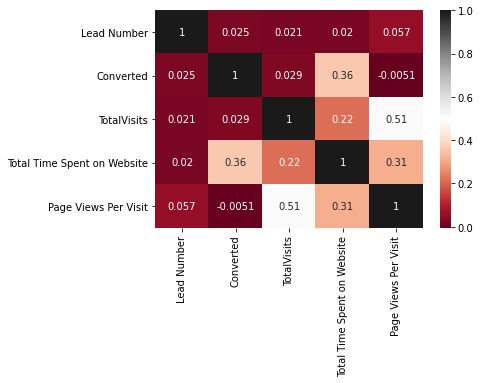

In [196]:
# checking the correlation between the variables
sns.heatmap(leads.corr(), cmap="RdGy", annot = True)
plt.show()

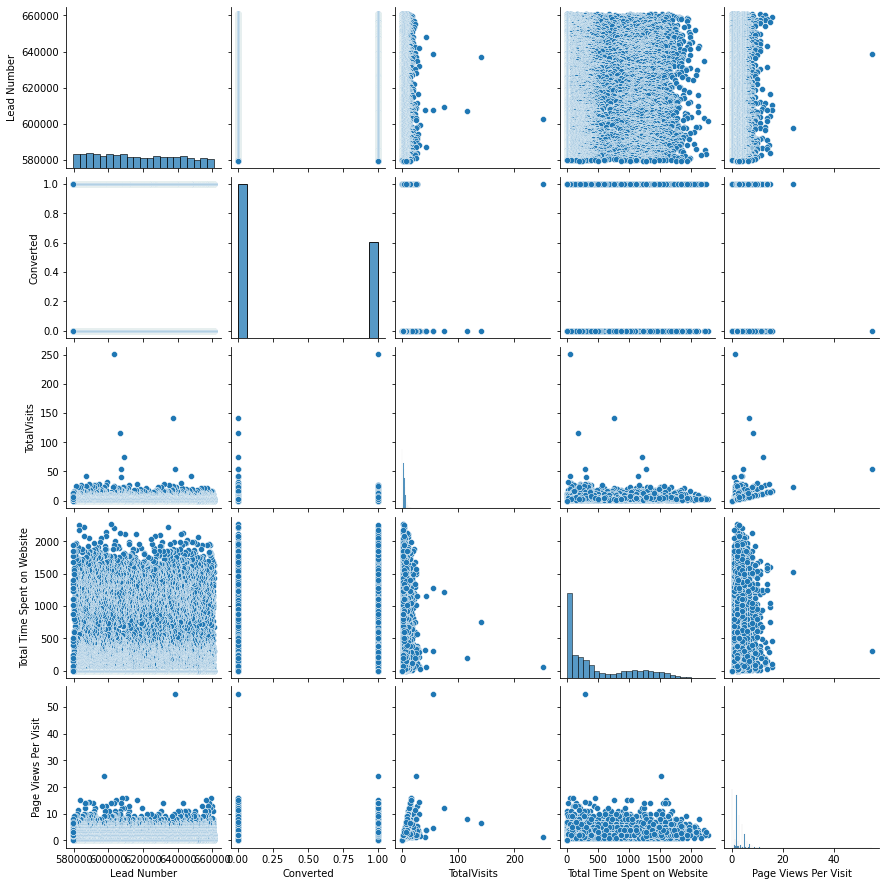

In [197]:
# preforming the EDA for the numerical variables
sns.pairplot(leads)
plt.show()

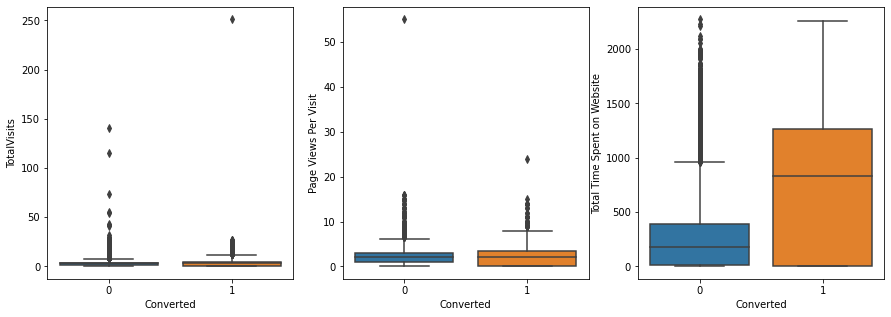

In [198]:
# Checking for the outliers in the variable

plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(x='Converted',y="TotalVisits",data=leads)
plt.subplot(1,3,2)
sns.boxplot(x='Converted',y="Page Views Per Visit",data=leads)
plt.subplot(1,3,3)
sns.boxplot(x='Converted',y="Total Time Spent on Website",data=leads)

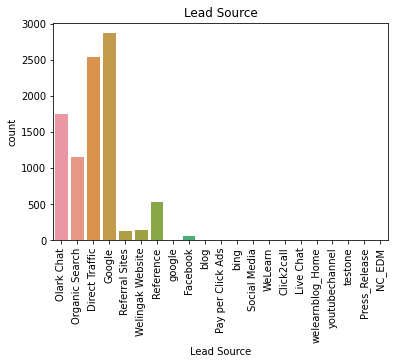

In [199]:
# analysis of the Lead Source variable
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [200]:
# "Google" is the highest count and NULL values are only 0.39 % so we can safely replace them with "Google"
leads["Lead Source"] = leads["Lead Source"].replace(np.NaN,"Google")

In [201]:
#now checking value distribution

leads["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [202]:
#replacing google columns value to Google

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [203]:
# Lead Source  - grouping under "Other Sources"
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel',"Facebook","Referral Sites","Welingak Website","Reference"], 'Other Sources')

In [204]:
#now checking value distribution

leads["Lead Source"].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Other Sources      879
Name: Lead Source, dtype: int64

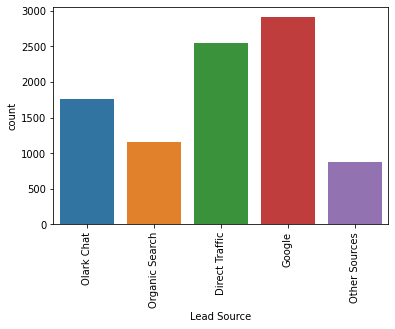

In [205]:
#lets see graphically

sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.show()

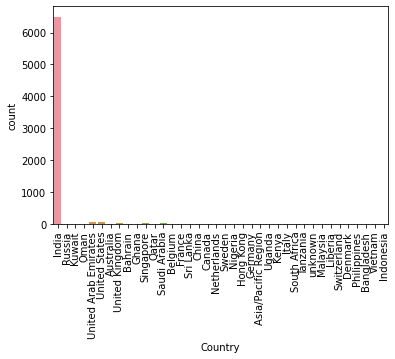

In [206]:
# analysis of the Country variable 
sns.countplot(leads['Country']).tick_params(axis='x', rotation = 90)
plt.show()

In [207]:
#conving na to Not mentioned

leads['Country']=leads['Country'].fillna('Not mentioned')

In [208]:
#categorizing in below mentioned 3 categories

def Country_map(x):
    category = ""
    if x == "India":
        return "India"
    elif x == "Not mentioned":
        return "Not mentioned"
    else:
        return "Other Countries"

leads['Country'] = leads.apply(lambda x:Country_map(x['Country']), axis = 1)
leads['Country'].value_counts()

India              6492
Not mentioned      2461
Other Countries     287
Name: Country, dtype: int64

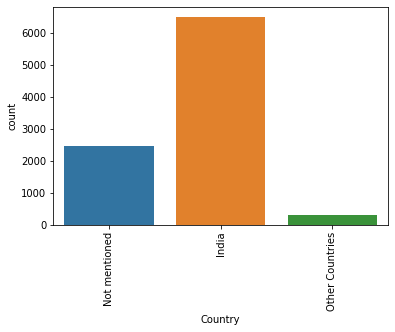

In [209]:
#lets check it graphically

sns.countplot(leads['Country']).tick_params(axis='x', rotation = 90)
plt.show()

####The graph shows majority of the learners are from India

In [210]:
# we can check and see there is no null value remaining

leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Country                                   0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
dtype: int64

##Step 5: Data Preparation

###Dummy Variable

In [211]:
#checking columns to create dummies

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [212]:
#creating dummy variables for the categorical variables in a separate variable

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Country', 'Specialization','What is your current occupation',"A free copy of Mastering The Interview"]], drop_first=True)
leads = pd.concat([leads, dummy],axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Country_Not mentioned,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,0,0.0,0,0.0,Not mentioned,Finance Management,Unemployed,No,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,India,Finance Management,Unemployed,No,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Student,Yes,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Finance Management,Unemployed,No,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [213]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source','Country', 'Specialization','What is your current occupation',"A free copy of Mastering The Interview"], axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

##Step 6: Test and Train Split

In [214]:
# splitting the data set into training and testing sets randomly 

lead_train, lead_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [215]:
# importing the necessary library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [216]:
# checking unique count of Values

leads.nunique()

Lead Number                                             9240
Converted                                                  2
TotalVisits                                               41
Total Time Spent on Website                             1731
Page Views Per Visit                                     114
Lead Origin_Landing Page Submission                        2
Lead Origin_Lead Add Form                                  2
Lead Origin_Lead Import                                    2
Lead Origin_Quick Add Form                                 2
Lead Source_Google                                         2
Lead Source_Olark Chat                                     2
Lead Source_Organic Search                                 2
Lead Source_Other Sources                                  2
Country_Not mentioned                                      2
Country_Other Countries                                    2
Specialization_Business Administration                     2
Specialization_E-Busines

In [217]:
# scaling the numerical variables using Min-Max Scaler of the training data-set.

numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

lead_train[numerical_vars] = scaler.fit_transform(lead_train[numerical_vars])

lead_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Country_Not mentioned,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,641410,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,597687,0,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3516,626825,0,0.019920,0.046655,0.045455,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,587928,0,0.019920,0.541373,0.090909,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3934,622366,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [218]:
#description of train data 

lead_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Country_Not mentioned,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.381262,0.013815,0.212974,0.042686,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.096475,0.267007,0.031540,0.043599,0.005720,0.012987,0.472944,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613,0.311843
std,23372.003514,0.485734,0.021048,0.240566,0.039326,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.295264,0.442430,0.174785,0.204218,0.075423,0.113227,0.499306,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582,0.463282
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.000000,0.003984,0.005282,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,615720.500000,0.000000,0.011952,0.108275,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,637348.750000,1.000000,0.019920,0.407790,0.054545,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [219]:
#Dividing into X and Y set for modelling

X_train = lead_train.drop(['Lead Number','Converted'],axis = 1)
y_train = lead_train['Converted']

In [220]:
#checking x train data

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Country_Not mentioned,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3516,0.019920,0.046655,0.045455,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [221]:
#checking y train data

y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

##Step 7: Model Building

In [222]:
logm = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.0
Date:                Tue, 10 Aug 2021   Deviance:                       6076.0
Time:                        15:41:26   Pearson chi2:                 8.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
TotalVisits                                              4.9091      1.977      2.483      0.013       1.034       8.784
Total Time Spent on Website                              4.5979      0.157     29.378      0.000       4.291       4.905
Page Views Per Visit                                    -0.7220      1.126     -0.641      0.522      -2.930       1.486
Lead Origin_Landing Page Submission                     -0.2549      0.109     -2.336      0.019      -0.469      -0.041
Lead Origin_Lead Add Form                                3.7187      0.364     10.216      0.000       3.005       4.432
Lead Origin_Lead Import                                 -0.4131      0.623     -0.663      0.507      -1.634       0.808
Lead Origin_Quick Add Form                              18.9941   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.3793      0.105      3.596      0.000       0.173       0.586
Lead Source_Olark Chat                                   0.6776      0.247      2.746      0.006       0.194       1.161
Lead Source_Organic Search                               0.2284      0.121      1.894      0.058      -0.008       0.465
Lead Source_Other Sources                                0.0673      0.257      0.262      0.794      -0.437       0.572
Country_Not mentioned                                    0.4217      0.235      1.792      0.073      -0.040       0.883
Country_Other Countries                                 -0.2186      0.197     -1.110      0.267      -0.604       0.167
Specialization_Business Administration                  -0.4160      0.227     -1.836      0.066      -0.860       0.028
Specialization_E-Business                               -0.4665      0.451     -1.035      0.300      -1.350       0.417
Specialization_E-COMMERCE                               -0.0691      0.313     -0.220      0.825      -0.683       0.545
Specialization_Finance Management                       -0.8194      0.181     -4.532      0.000      -1.174      -0.465
Specialization_Healthcare Management                    -0.2245      0.308     -0.729      0.466      -0.828       0.379
Specialization_Hospitality Management                   -1.4107      0.350     -4.029      0.000      -2.097      -0.724
Specialization_Human Resource Management                -0.4187      0.196     -2.139      0.032      -0.802      -0.035
Specialization_IT Projects Management                   -0.1963      0.230     -0.855      0.393      -0.646       0.254
Specialization_International Business                   -0.6973      0.296     -2.358      0.018      -1.277      -0.118
Specialization_Marketing Management                     -0

###RFE - Recursive Feature Elimination

In [223]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,18)
rfe = rfe.fit(X_train, y_train)

In [225]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other Sources', False, 19),
 ('Country_Not mentioned', True, 1),
 ('Country_Other Countries', False, 4),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', False, 14),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_International Business', True, 1),
 ('Specialization_Market

In [226]:
#checking supporting colmuns

column = X_train.columns[rfe.support_]
column

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Country_Not mentioned',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [227]:
#checking Non- supporting colmuns

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Other Sources', 'Country_Other Countries',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [228]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[column]

In [229]:
# Adding a constant variable to X_train 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
X_train.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_Not mentioned,Specialization_Finance Management,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Working Professional
1871,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6795,1.0,0.015936,0.214349,0.024182,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3516,1.0,0.019920,0.046655,0.045455,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
8105,1.0,0.019920,0.541373,0.090909,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3934,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0


In [230]:
#using GLM(Generalised Linear Models) method further to check summary of Model

logm = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.3
Date:                Tue, 10 Aug 2021   Deviance:                       6088.5
Time:                        15:41:26   Pearson chi2:                 8.61e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2820      0.101    -22.698      0.000      -2.479      -2.085
TotalVisits                                              5.0267      2.016      2.493      0.013       1.075       8.978
Total Time Spent on Website                              4.5996      0.156     29.496      0.000       4.294       4.905
Page Views Per Visit                                    -0.9211      1.124     -0.819      0.413      -3.124       1.282
Lead Origin_Lead Add Form                                4.0221      0.268     15.015      0.000       3.497       4.547
Lead Origin_Quick Add Form                              19.4955   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.4592      0.082      5.573      0.000       0.298       0.621
Lead Source_Olark Chat                                   0.9001      0.213      4.227      0.000       0.483       1.317
Lead Source_Organic Search                               0.2968      0.111      2.674      0.007       0.079       0.514
Country_Not mentioned                                    0.3786      0.214      1.768      0.077      -0.041       0.798
Specialization_Finance Management                       -0.3757      0.076     -4.941      0.000      -0.525      -0.227
Specialization_Hospitality Management                   -1.0736      0.309     -3.470      0.001      -1.680      -0.467
Specialization_International Business                   -0.3805      0.249     -1.528      0.127      -0.869       0.108
Specialization_Retail Management                        -0.4673      0.315     -1.486      0.137      -1.084       0.149
Specialization_Rural and Agribusiness                    0.4236      0.361      1.173      0.241      -0.284       1.132
Specialization_Services Excellence                      -0.2837      0.482     -0.588      0.557      -1.229       0.662
What is your current occupation_Housewife               22.5148   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Other                   -0.5182      0.794     -0.653      0.514      -2.074       1.038
What is your current occupation_Working Professional     2.8341      0.181     15.686      0.000       2.480       3.188
========================================================================================================================
"""

In [231]:
#dropping constant variable

X_train = X_train.drop(['const'], axis=1)

In [232]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not mentioned,11.06
6,Lead Source_Olark Chat,7.78
3,Lead Origin_Lead Add Form,3.99
2,Page Views Per Visit,3.01
9,Specialization_Finance Management,2.38
1,Total Time Spent on Website,1.95
5,Lead Source_Google,1.88
0,TotalVisits,1.85
7,Lead Source_Organic Search,1.46
17,What is your current occupation_Working Profes...,1.17


In [233]:
# dropping the variable with high p-value
X_train = X_train.drop(['Lead Origin_Quick Add Form'], axis = 1)

###Iteration 1

In [234]:
X_train1 = sm.add_constant(X_train)

In [235]:
res = sm.GLM(y_train, X_train1, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.3
Date:                Tue, 10 Aug 2021   Deviance:                       6088.6
Time:                        15:41:26   Pearson chi2:                 8.61e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2823      0.101    -22.701      0.000      -2.479      -2.085
TotalVisits                                              5.0276      2.016      2.493      0.013       1.076       8.980
Total Time Spent on Website                              4.6005      0.156     29.512      0.000       4.295       4.906
Page Views Per Visit                                    -0.9218      1.124     -0.820      0.412      -3.125       1.282
Lead Origin_Lead Add Form                                4.0203      0.268     15.017      0.000       3.496       4.545
Lead Source_Google                                       0.4594      0.082      5.576      0.000       0.298       0.621
Lead Source_Olark Chat                                   0.8985      0.213      4.222      0.000       0.481       1.316
Lead Source_Organic Search                               0.2969      0.111      2.675      0.007       0.079       0.514
Country_Not mentioned                                    0.3808      0.214      1.780      0.075      -0.039       0.800
Specialization_Finance Management                       -0.3760      0.076     -4.945      0.000      -0.525      -0.227
Specialization_Hospitality Management                   -1.0739      0.309     -3.470      0.001      -1.680      -0.467
Specialization_International Business                   -0.3807      0.249     -1.528      0.126      -0.869       0.108
Specialization_Retail Management                        -0.4674      0.315     -1.486      0.137      -1.084       0.149
Specialization_Rural and Agribusiness                    0.4235      0.361      1.172      0.241      -0.284       1.131
Specialization_Services Excellence                      -0.2837      0.482     -0.588      0.557      -1.229       0.662
What is your current occupation_Housewife               22.5149   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Other                   -0.5184      0.794     -0.653      0.514      -2.074       1.038
What is your current occupation_Working Professional     2.8341      0.181     15.686      0.000       2.480       3.188
========================================================================================================================
"""

In [236]:
X_train1 = X_train1.drop(['const'], axis=1)

In [237]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country_Not mentioned,10.98
5,Lead Source_Olark Chat,7.74
3,Lead Origin_Lead Add Form,3.97
2,Page Views Per Visit,3.00
8,Specialization_Finance Management,2.37
1,Total Time Spent on Website,1.94
4,Lead Source_Google,1.87
0,TotalVisits,1.85
6,Lead Source_Organic Search,1.46
16,What is your current occupation_Working Profes...,1.17


In [238]:
X_train1 = X_train1.drop(['Country_Not mentioned'], axis = 1)

###Iteration 2:

In [239]:
X_train2 = sm.add_constant(X_train1)

In [240]:
res = sm.GLM(y_train, X_train2, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3045.9
Date:                Tue, 10 Aug 2021   Deviance:                       6091.7
Time:                        15:41:27   Pearson chi2:                 8.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2586      0.100    -22.686      0.000      -2.454      -2.063
TotalVisits                                              4.8200      1.960      2.459      0.014       0.978       8.662
Total Time Spent on Website                              4.5635      0.154     29.594      0.000       4.261       4.866
Page Views Per Visit                                    -1.0124      1.123     -0.901      0.367      -3.214       1.189
Lead Origin_Lead Add Form                                4.3597      0.190     22.965      0.000       3.988       4.732
Lead Source_Google                                       0.4495      0.082      5.480      0.000       0.289       0.610
Lead Source_Olark Chat                                   1.2133      0.121     10.032      0.000       0.976       1.450
Lead Source_Organic Search                               0.2911      0.111      2.629      0.009       0.074       0.508
Specialization_Finance Management                       -0.3548      0.075     -4.734      0.000      -0.502      -0.208
Specialization_Hospitality Management                   -1.0625      0.309     -3.440      0.001      -1.668      -0.457
Specialization_International Business                   -0.3749      0.248     -1.509      0.131      -0.862       0.112
Specialization_Retail Management                        -0.4681      0.314     -1.489      0.136      -1.084       0.148
Specialization_Rural and Agribusiness                    0.4300      0.360      1.193      0.233      -0.276       1.136
Specialization_Services Excellence                      -0.2841      0.482     -0.590      0.555      -1.228       0.660
What is your current occupation_Housewife               22.4979   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Other                   -0.5122      0.792     -0.646      0.518      -2.065       1.041
What is your current occupation_Working Professional     2.8378      0.181     15.715      0.000       2.484       3.192
========================================================================================================================
"""

In [241]:
X_train2 = X_train2.drop(['const'], axis=1)

In [242]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.00
7,Specialization_Finance Management,2.28
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.87
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.72
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.20
15,What is your current occupation_Working Profes...,1.17
9,Specialization_International Business,1.03


In [243]:
X_train2 = X_train2.drop(['What is your current occupation_Housewife'], axis = 1)

###Iteration 3

In [244]:
X_train3 = sm.add_constant(X_train2)

In [245]:
res = sm.GLM(y_train, X_train3, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.4
Date:                Tue, 10 Aug 2021   Deviance:                       6102.7
Time:                        15:41:27   Pearson chi2:                 8.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2502      0.099    -22.633      0.000      -2.445      -2.055
TotalVisits                                              4.7701      1.947      2.450      0.014       0.954       8.587
Total Time Spent on Website                              4.5614      0.154     29.602      0.000       4.259       4.863
Page Views Per Visit                                    -1.0600      1.124     -0.943      0.346      -3.263       1.143
Lead Origin_Lead Add Form                                4.3671      0.190     23.021      0.000       3.995       4.739
Lead Source_Google                                       0.4523      0.082      5.519      0.000       0.292       0.613
Lead Source_Olark Chat                                   1.2104      0.121     10.013      0.000       0.973       1.447
Lead Source_Organic Search                               0.2978      0.111      2.692      0.007       0.081       0.515
Specialization_Finance Management                       -0.3605      0.075     -4.816      0.000      -0.507      -0.214
Specialization_Hospitality Management                   -1.0693      0.309     -3.461      0.001      -1.675      -0.464
Specialization_International Business                   -0.3807      0.248     -1.532      0.125      -0.868       0.106
Specialization_Retail Management                        -0.4735      0.314     -1.507      0.132      -1.089       0.142
Specialization_Rural and Agribusiness                    0.4237      0.360      1.176      0.240      -0.282       1.130
Specialization_Services Excellence                      -0.2893      0.482     -0.601      0.548      -1.234       0.655
What is your current occupation_Other                   -0.5152      0.792     -0.650      0.516      -2.068       1.038
What is your current occupation_Working Professional     2.8335      0.181     15.691      0.000       2.480       3.187
========================================================================================================================
"""

In [246]:
X_train3 = X_train3.drop(['const'], axis=1)

In [247]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.00
7,Specialization_Finance Management,2.28
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.87
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.72
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.19
14,What is your current occupation_Working Profes...,1.16
9,Specialization_International Business,1.03


In [248]:
X_train3 = X_train3.drop(['Specialization_Services Excellence'], axis = 1)

###Iteration 4:

In [249]:
X_train4 = sm.add_constant(X_train3)

In [250]:
res = sm.GLM(y_train, X_train4, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.5
Date:                Tue, 10 Aug 2021   Deviance:                       6103.1
Time:                        15:41:27   Pearson chi2:                 8.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2542      0.099    -22.719      0.000      -2.449      -2.060
TotalVisits                                              4.7670      1.945      2.451      0.014       0.955       8.579
Total Time Spent on Website                              4.5628      0.154     29.613      0.000       4.261       4.865
Page Views Per Visit                                    -1.0620      1.124     -0.945      0.345      -3.265       1.141
Lead Origin_Lead Add Form                                4.3693      0.190     23.038      0.000       3.998       4.741
Lead Source_Google                                       0.4539      0.082      5.542      0.000       0.293       0.614
Lead Source_Olark Chat                                   1.2123      0.121     10.032      0.000       0.975       1.449
Lead Source_Organic Search                               0.2988      0.111      2.701      0.007       0.082       0.516
Specialization_Finance Management                       -0.3583      0.075     -4.791      0.000      -0.505      -0.212
Specialization_Hospitality Management                   -1.0668      0.309     -3.453      0.001      -1.672      -0.461
Specialization_International Business                   -0.3781      0.248     -1.522      0.128      -0.865       0.109
Specialization_Retail Management                        -0.4709      0.314     -1.498      0.134      -1.087       0.145
Specialization_Rural and Agribusiness                    0.4267      0.360      1.184      0.236      -0.279       1.133
What is your current occupation_Other                   -0.5127      0.792     -0.647      0.518      -2.066       1.040
What is your current occupation_Working Professional     2.8333      0.181     15.689      0.000       2.479       3.187
========================================================================================================================
"""

In [251]:
X_train4 = X_train4.drop(['const'], axis=1)

In [252]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.00
7,Specialization_Finance Management,2.27
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.87
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.72
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.19
13,What is your current occupation_Working Profes...,1.16
9,Specialization_International Business,1.03


In [253]:
X_train4 = X_train4.drop(['What is your current occupation_Other'], axis = 1)

###Iteration 5:

In [254]:
X_train5 = sm.add_constant(X_train4)

In [255]:
res = sm.GLM(y_train, X_train5, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.8
Date:                Tue, 10 Aug 2021   Deviance:                       6103.5
Time:                        15:41:28   Pearson chi2:                 8.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2546      0.099    -22.722      0.000      -2.449      -2.060
TotalVisits                                              4.7324      1.935      2.446      0.014       0.940       8.525
Total Time Spent on Website                              4.5597      0.154     29.613      0.000       4.258       4.862
Page Views Per Visit                                    -1.0632      1.124     -0.946      0.344      -3.265       1.139
Lead Origin_Lead Add Form                                4.3695      0.190     23.039      0.000       3.998       4.741
Lead Source_Google                                       0.4554      0.082      5.563      0.000       0.295       0.616
Lead Source_Olark Chat                                   1.2126      0.121     10.035      0.000       0.976       1.449
Lead Source_Organic Search                               0.2995      0.111      2.707      0.007       0.083       0.516
Specialization_Finance Management                       -0.3580      0.075     -4.788      0.000      -0.505      -0.211
Specialization_Hospitality Management                   -1.0652      0.309     -3.448      0.001      -1.671      -0.460
Specialization_International Business                   -0.3768      0.248     -1.517      0.129      -0.864       0.110
Specialization_Retail Management                        -0.4693      0.314     -1.494      0.135      -1.085       0.147
Specialization_Rural and Agribusiness                    0.4286      0.360      1.190      0.234      -0.277       1.134
What is your current occupation_Working Professional     2.8342      0.181     15.695      0.000       2.480       3.188
========================================================================================================================
"""

In [256]:
X_train5 = X_train5.drop(['const'], axis=1)

In [257]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.00
7,Specialization_Finance Management,2.27
1,Total Time Spent on Website,1.92
4,Lead Source_Google,1.87
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.72
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.19
12,What is your current occupation_Working Profes...,1.16
9,Specialization_International Business,1.03


In [258]:
X_train5 = X_train5.drop(['Page Views Per Visit'], axis = 1)

###Iteration 6:

In [259]:
X_train6 = sm.add_constant(X_train5)

In [260]:
res = sm.GLM(y_train, X_train6, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3052.2
Date:                Tue, 10 Aug 2021   Deviance:                       6104.4
Time:                        15:41:28   Pearson chi2:                 8.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3003      0.087    -26.550      0.000      -2.470      -2.131
TotalVisits                                              4.0802      1.649      2.474      0.013       0.848       7.313
Total Time Spent on Website                              4.5545      0.154     29.608      0.000       4.253       4.856
Lead Origin_Lead Add Form                                4.4059      0.186     23.721      0.000       4.042       4.770
Lead Source_Google                                       0.4507      0.082      5.517      0.000       0.291       0.611
Lead Source_Olark Chat                                   1.2466      0.115     10.801      0.000       1.020       1.473
Lead Source_Organic Search                               0.2790      0.108      2.575      0.010       0.067       0.491
Specialization_Finance Management                       -0.3470      0.074     -4.699      0.000      -0.492      -0.202
Specialization_Hospitality Management                   -1.0652      0.309     -3.449      0.001      -1.671      -0.460
Specialization_International Business                   -0.3817      0.248     -1.537      0.124      -0.868       0.105
Specialization_Retail Management                        -0.4701      0.315     -1.495      0.135      -1.087       0.146
Specialization_Rural and Agribusiness                    0.4472      0.359      1.246      0.213      -0.256       1.151
What is your current occupation_Working Professional     2.8333      0.181     15.693      0.000       2.479       3.187
========================================================================================================================
"""

In [261]:
X_train6 = X_train6.drop(['const'], axis=1)

In [262]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.27
1,Total Time Spent on Website,1.73
4,Lead Source_Olark Chat,1.72
3,Lead Source_Google,1.71
0,TotalVisits,1.46
5,Lead Source_Organic Search,1.29
2,Lead Origin_Lead Add Form,1.19
11,What is your current occupation_Working Profes...,1.16
7,Specialization_Hospitality Management,1.02
8,Specialization_International Business,1.02


In [263]:
X_train6 = X_train6.drop(['Specialization_Rural and Agribusiness'], axis = 1)

###Iteration 7:

In [264]:
X_train7 = sm.add_constant(X_train6)

In [265]:
res = sm.GLM(y_train, X_train7, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3053.0
Date:                Tue, 10 Aug 2021   Deviance:                       6106.0
Time:                        15:41:28   Pearson chi2:                 8.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2953      0.087    -26.488      0.000      -2.465      -2.125
TotalVisits                                              4.2204      1.673      2.523      0.012       0.942       7.499
Total Time Spent on Website                              4.5519      0.154     29.605      0.000       4.251       4.853
Lead Origin_Lead Add Form                                4.4077      0.186     23.726      0.000       4.044       4.772
Lead Source_Google                                       0.4492      0.082      5.500      0.000       0.289       0.609
Lead Source_Olark Chat                                   1.2489      0.115     10.814      0.000       1.023       1.475
Lead Source_Organic Search                               0.2835      0.108      2.619      0.009       0.071       0.496
Specialization_Finance Management                       -0.3538      0.074     -4.805      0.000      -0.498      -0.209
Specialization_Hospitality Management                   -1.0720      0.309     -3.472      0.001      -1.677      -0.467
Specialization_International Business                   -0.3886      0.248     -1.565      0.117      -0.875       0.098
Specialization_Retail Management                        -0.4772      0.314     -1.518      0.129      -1.093       0.139
What is your current occupation_Working Professional     2.8306      0.180     15.683      0.000       2.477       3.184
========================================================================================================================
"""

In [266]:
X_train7 = X_train7.drop(['const'], axis=1)

In [267]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.26
1,Total Time Spent on Website,1.73
3,Lead Source_Google,1.71
4,Lead Source_Olark Chat,1.71
0,TotalVisits,1.45
5,Lead Source_Organic Search,1.28
2,Lead Origin_Lead Add Form,1.19
10,What is your current occupation_Working Profes...,1.16
7,Specialization_Hospitality Management,1.02
8,Specialization_International Business,1.02


In [268]:
X_train7 = X_train7.drop(['Specialization_Retail Management'], axis = 1)

###Iteration 8:

In [269]:
X_train8 = sm.add_constant(X_train7)

In [270]:
res = sm.GLM(y_train, X_train8, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3054.2
Date:                Tue, 10 Aug 2021   Deviance:                       6108.3
Time:                        15:41:28   Pearson chi2:                 8.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3029      0.086    -26.625      0.000      -2.472      -2.133
TotalVisits                                              4.1911      1.662      2.522      0.012       0.934       7.448
Total Time Spent on Website                              4.5475      0.154     29.591      0.000       4.246       4.849
Lead Origin_Lead Add Form                                4.4068      0.186     23.728      0.000       4.043       4.771
Lead Source_Google                                       0.4480      0.082      5.487      0.000       0.288       0.608
Lead Source_Olark Chat                                   1.2466      0.115     10.798      0.000       1.020       1.473
Lead Source_Organic Search                               0.2827      0.108      2.613      0.009       0.071       0.495
Specialization_Finance Management                       -0.3436      0.073     -4.686      0.000      -0.487      -0.200
Specialization_Hospitality Management                   -1.0611      0.309     -3.438      0.001      -1.666      -0.456
Specialization_International Business                   -0.3782      0.248     -1.525      0.127      -0.864       0.108
What is your current occupation_Working Professional     2.8273      0.180     15.670      0.000       2.474       3.181
========================================================================================================================
"""

In [271]:
X_train8 = X_train8.drop(['const'], axis=1)

In [272]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.25
1,Total Time Spent on Website,1.73
3,Lead Source_Google,1.71
4,Lead Source_Olark Chat,1.71
0,TotalVisits,1.45
5,Lead Source_Organic Search,1.28
2,Lead Origin_Lead Add Form,1.19
9,What is your current occupation_Working Profes...,1.16
7,Specialization_Hospitality Management,1.02
8,Specialization_International Business,1.02


In [273]:
X_train8 = X_train8.drop(['Specialization_International Business'], axis = 1)

###Iteration 9:

In [274]:
X_train9 = sm.add_constant(X_train8)

In [275]:
res = sm.GLM(y_train, X_train9, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3055.4
Date:                Tue, 10 Aug 2021   Deviance:                       6110.7
Time:                        15:41:28   Pearson chi2:                 8.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3157      0.086    -26.886      0.000      -2.484      -2.147
TotalVisits                                              4.1950      1.659      2.528      0.011       0.942       7.447
Total Time Spent on Website                              4.5505      0.154     29.615      0.000       4.249       4.852
Lead Origin_Lead Add Form                                4.4082      0.186     23.740      0.000       4.044       4.772
Lead Source_Google                                       0.4449      0.082      5.453      0.000       0.285       0.605
Lead Source_Olark Chat                                   1.2462      0.115     10.799      0.000       1.020       1.472
Lead Source_Organic Search                               0.2815      0.108      2.602      0.009       0.070       0.494
Specialization_Finance Management                       -0.3303      0.073     -4.534      0.000      -0.473      -0.187
Specialization_Hospitality Management                   -1.0488      0.309     -3.398      0.001      -1.654      -0.444
What is your current occupation_Working Professional     2.8318      0.180     15.695      0.000       2.478       3.185
========================================================================================================================
"""

In [276]:
X_train9 = X_train9.drop(['const'], axis=1)

In [277]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.23
1,Total Time Spent on Website,1.72
3,Lead Source_Google,1.70
4,Lead Source_Olark Chat,1.70
0,TotalVisits,1.44
5,Lead Source_Organic Search,1.28
2,Lead Origin_Lead Add Form,1.19
8,What is your current occupation_Working Profes...,1.16
7,Specialization_Hospitality Management,1.02


###Generating Predictions

In [278]:
X_train9 =  sm.add_constant(X_train9)

In [279]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train9)
y_train_pred

1871    0.255499
6795    0.167465
3516    0.249011
8105    0.662904
3934    0.197854
          ...   
350     0.926725
79      0.995216
8039    0.197854
6936    0.204128
5640    0.197854
Length: 6468, dtype: float64

In [280]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2554986 , 0.16746532, 0.24901116, 0.66290434, 0.19785433,
       0.97317488, 0.14843543, 0.99652073, 0.26955017, 0.72701343])

In [281]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.255499
1,0,0.167465
2,0,0.249011
3,0,0.662904
4,0,0.197854


In [282]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.255499,0
1,0,0.167465,0
2,0,0.249011,0
3,0,0.662904,1
4,0,0.197854,0


##Step 8: Model Evaluation

In [283]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3522,  480],
       [ 914, 1552]])

In [284]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7844774273345702

In [285]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [286]:
# Calculating the sensitivity
TP/(TP+FN)

0.6293592862935928

In [287]:
# Calculating the specificity
TN/(TN+FP)

0.8800599700149925

##Step 9: Plotting the ROC Curve

In [288]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [289]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

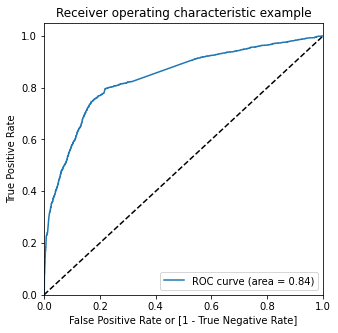

(array([0.        , 0.        , 0.        , ..., 0.99950025, 0.99975012,
        1.        ]),
 array([0.00000000e+00, 4.05515004e-04, 8.11030008e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99977993, 0.99977993, 0.99974632, ..., 0.03510493, 0.0341014 ,
        0.0334255 ]))

In [290]:
# checking the area under the curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###What is the optimal cut-off value ?

In [291]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.255499,0,1,1,1,0,0,0,0,0,0,0
1,0,0.167465,0,1,1,0,0,0,0,0,0,0,0
2,0,0.249011,0,1,1,1,0,0,0,0,0,0,0
3,0,0.662904,1,1,1,1,1,1,1,1,0,0,0
4,0,0.197854,0,1,1,0,0,0,0,0,0,0,0


In [292]:
# checking the sensitivity,accuracy,precision and specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.417440  0.989051  0.065217
0.2   0.2  0.739023  0.823601  0.686907
0.3   0.3  0.792672  0.759935  0.812844
0.4   0.4  0.795918  0.707624  0.850325
0.5   0.5  0.784477  0.629359  0.880060
0.6   0.6  0.772573  0.547445  0.911294
0.7   0.7  0.754174  0.440795  0.947276
0.8   0.8  0.735312  0.347932  0.974013
0.9   0.9  0.685374  0.184915  0.993753


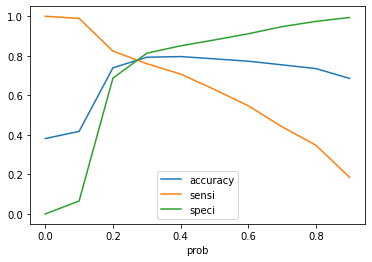

In [293]:
# Plotting it 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [294]:
# from the graph taking the optimal cut-off value as 0.30
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.255499,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.167465,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.249011,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.662904,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.197854,0,1,1,0,0,0,0,0,0,0,0,0


In [295]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926716141001855

In [296]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3253,  749],
       [ 592, 1874]])

In [297]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [298]:
# Calculating the sensitivity
TP/(TP+FN)

0.7599351175993512

In [299]:
# Calculating the specificity
TN/(TN+FP)

0.8128435782108946

In [300]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3522,  480],
       [ 914, 1552]])

In [301]:
print("Precision")
confusion[1,1]/(confusion[0,1]+confusion[1,1])

Precision


0.7637795275590551

In [302]:
print("Recall")
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Recall


0.6293592862935928

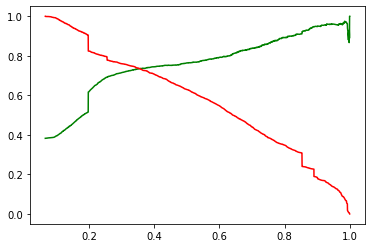

In [303]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###Through the curve it is shown that the optimum value is nearly 0.4

In [304]:
# scaling the numerical variables using Min-Max Scaler of the training data-set.

numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

lead_test[numerical_vars] = scaler.transform(lead_test[numerical_vars])

lead_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Country_Not mentioned,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
4269,619003,1,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2376,636884,1,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7766,590281,1,0.019920,0.025968,0.090909,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9199,579892,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4359,617929,1,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [305]:
# splitting the test data into y and x 
X_test = lead_test.drop(['Converted','Lead Number'],axis = 1)
y_test = lead_test['Converted']

In [306]:
# adding a constant
X_test_sm = sm.add_constant(X_test)

In [307]:
# taking all the columns from the final model 
X_test = X_test_sm[X_train9.columns]

In [308]:
# predicting the y value
y_test_pred = res.predict(X_test)
y_test_pred[:10]

4269    0.380516
2376    0.853497
7766    0.761826
9199    0.197854
4359    0.890178
9186    0.367077
1631    0.477861
8963    0.166012
8007    0.188171
5324    0.182396
dtype: float64

In [309]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred.head()

,Converted,Conversion_Prob
4269,1,0.380516
2376,1,0.853497
7766,1,0.761826
9199,0,0.197854
4359,1,0.890178


In [310]:
# Making prediction using cut off 0.30
y_test_pred['final_predicted'] = y_test_pred.Conversion_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_test_pred

,Converted,Conversion_Prob,final_predicted
4269,1,0.380516,1
2376,1,0.853497,1
7766,1,0.761826,1
9199,0,0.197854,0
4359,1,0.890178,1
...,...,...,...
8649,0,0.184801,0
2152,1,0.900892,1
7101,0,0.197854,0
5331,0,0.722126,1


In [311]:
# generating the lead score and lead number
y_test_pred['Lead Score'] = round(y_test_pred['Conversion_Prob']*100,2)
y_test_pred['Lead Number'] = lead_test['Lead Number']
y_test_pred.reset_index(drop=True, inplace=True)
y_test_pred

,Converted,Conversion_Prob,final_predicted,Lead Score,Lead Number
0,1,0.380516,1,38.05,619003
1,1,0.853497,1,85.35,636884
2,1,0.761826,1,76.18,590281
3,0,0.197854,0,19.79,579892
4,1,0.890178,1,89.02,617929
...,...,...,...,...,...
2767,0,0.184801,0,18.48,583730
2768,1,0.900892,1,90.09,639134
2769,0,0.197854,0,19.79,595041
2770,0,0.722126,1,72.21,608916


In [312]:
# Check the overall accuracy
print("Accuracy")
metrics.accuracy_score(y_test_pred['Converted'], y_test_pred.final_predicted)

Accuracy


0.7882395382395382

In [313]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred['Converted'], y_test_pred.final_predicted )
confusion2

array([[1363,  314],
       [ 273,  822]])

In [314]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [315]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7235915492957746

In [316]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7506849315068493

In [317]:
print("Sensitivity")
print(TP / float(TP+FN))

Sensitivity
0.7506849315068493


In [318]:
print("Specificity")
print(TN / float(TN+FP))

Specificity
0.8127608825283243


##Step 10: Conclusion:

From the final model developed we are able to generate a lead score which shows how likely the lead is getting converted. From the final predictions it is evident that the people with lead score more than 30 are likely to get converted and sales team can concentrate people with lead score more than 30 to convert them to a lead

It was found that the variables that mattered the most in the potential buyers are:
1. The total time spend on the Website.
2. Total number of visits. 
3. When the lead source was: 
a. Google 
b. Olark chat
c. Organic search 
4. When the lead origin is Lead add format. 
5. When their current occupation is as a working professional. 
6. Specialization is either Finance Mangagemnent or Hospitality Mangagemnent.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.
